# **3. Implement a feed forward neural network with three hidden layers for classification on cifar-10 dataset**

In [ ]:
import tensorflow as tf
from keras import models,layers
from keras.datasets import cifar10
from keras.utils import to_categorical

In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
# Normalize pixel values to be between 0 and 1
X_train, X_test= X_train / 255.0, X_test / 255.0


In [ ]:
print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [ ]:
# Define the model
model = models.Sequential()

# Flatten the input for the fully connected layer
model.add(layers.Flatten(input_shape=(32, 32, 3)))

# Three hidden layers with ReLU activation
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 13s 5ms/step - loss: 1.8592 - accuracy: 0.3278 - val_loss: 1.6996 - val_accuracy: 0.3868
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6749 - accuracy: 0.3996 - val_loss: 1.6449 - val_accuracy: 0.4069
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5880 - accuracy: 0.4330 - val_loss: 1.5731 - val_accuracy: 0.4367
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5302 - accuracy: 0.4517 - val_loss: 1.5233 - val_accuracy: 0.4575
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4919 - accuracy: 0.4660 - val_loss: 1.5045 - val_accuracy: 0.4708
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4612 - accuracy: 0.4775 - val_loss: 1.5188 - val_accuracy: 0.4588
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4365 - accuracy: 0.4868 - val_loss: 1.4675 - val_accuracy

In [ ]:
# Evaluate the model
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4649 - accuracy: 0.4905


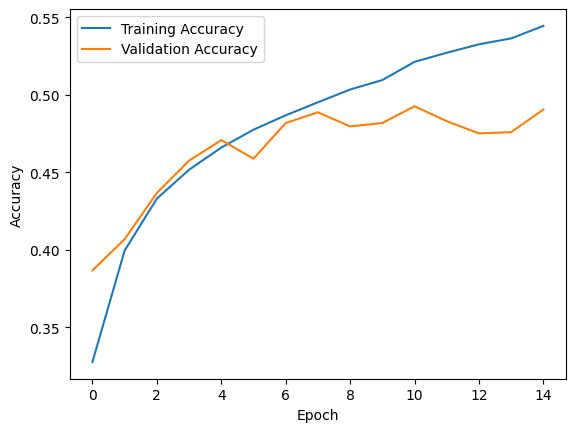

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **4. Analyzing the impact of optimization and weight initialization techniques on neural networks**

In [ ]:
import tensorflow as tf
import numpy as np
from keras import models,layers,optimizers
from keras.datasets import cifar10
from keras.utils import to_categorical

In [ ]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train = X_train.astype('float32')/ 255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
#Xavier Initialization
model1 = models.Sequential()

model1.add(layers.Flatten(input_shape=(32,32,3)))

model1.add(layers.Dense(256,activation='relu',kernel_initializer='glorot_uniform'))
model1.add(layers.Dense(256,activation='relu',kernel_initializer='glorot_uniform'))

model1.add(layers.Dense(10,activation='softmax',kernel_initializer='glorot_uniform'))


In [ ]:
#Kaiming Initialization
model2 = models.Sequential()

model2.add(layers.Flatten(input_shape=(32,32,3)))

model2.add(layers.Dense(256,activation='relu',kernel_initializer='he_normal'))
model2.add(layers.Dense(128,activation='relu',kernel_initializer='he_normal'))

model2.add(layers.Dense(10,activation='softmax',kernel_initializer='he_normal'))


In [ ]:
#With dropout Layer
model3 = models.Sequential()
model3.add(layers.Flatten(input_shape=(32,32,3)))

model3.add(layers.Dense(256,activation='relu',kernel_initializer='glorot_uniform'))
model3.add(layers.Dropout(0.25))
model3.add(layers.Dense(128,activation='relu'))

model3.add(layers.Dense(10,activation='softmax'))


In [ ]:
# with batch normalization
model4 = models.Sequential()
model4.add(layers.Flatten(input_shape=(32,32,3)))
model4.add(layers.Dense(256,activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Activation('relu'))
model4.add(layers.Dense(10,activation='softmax'))

In [ ]:
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model1.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model1.summary())
Xavier_history  = model1.fit(X_train,y_train,epochs=15,batch_size=32,validation_split=0.2)
Xavier_score = model1.evaluate(X_test,y_test,batch_size=32)
print(Xavier_score)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 855050 (3.26 MB)
Trainable params: 855050 (3.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/15
1250/1250 [==============================] - 11s 5ms/step - loss: 1.8755 - accuracy: 0.3203 - val_loss: 1.8879 - val_accuracy: 0.3179
Ep

In [ ]:
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model2.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model2.summary())
Kaiming_history  = model2.fit(X_train,y_train,epochs=15,batch_size=32,validation_split=0.2)
Kaiming_score = model2.evaluate(X_test,y_test,batch_size=128)
print(Kaiming_score)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               786688    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 820874 (3.13 MB)
Trainable params: 820874 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8932 - accuracy: 0.3129 - val_loss: 1.8377 - val_accuracy: 0.3323
E

In [ ]:
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model3.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model3.summary())

dropout_history  = model3.fit(X_train,y_train,epochs=15,batch_size=32,validation_split=0.2)
dropout_score = model3.evaluate(X_test,y_test,batch_size=128)
print(dropout_score)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               786688    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 820874 (3.13 MB)
Trainable params: 820874 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/15
12

In [ ]:
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model4.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model4.summary())

BN_history = model4.fit(X_train,y_train,epochs=15,batch_size=128,validation_split=0.2)
BN_score = model4.evaluate(X_test,y_test,batch_size=128)
print(BN_score)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 256)               786688    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
Total params: 790282 (3.01 MB)
Trainable params: 789770 (3.01 MB)
Non-trainable params: 512 (2.00 KB)
__________________

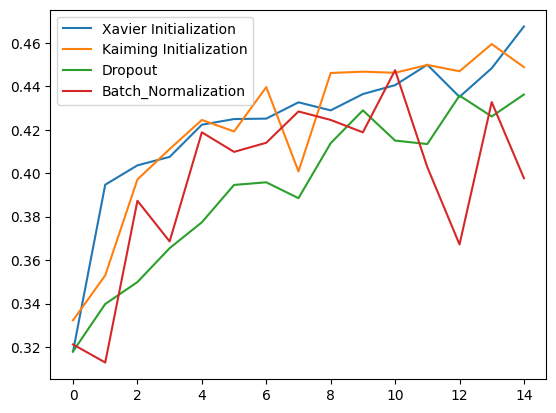

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Xavier_history.history['val_accuracy'],label='Xavier Initialization')
plt.plot(Kaiming_history.history['val_accuracy'],label='Kaiming Initialization')
plt.plot(dropout_history.history['val_accuracy'],label='Dropout')
plt.plot(BN_history.history['val_accuracy'],label='Batch_Normalization')
plt.legend()
plt.show()

# **5. Digit Classification using CNN Architecture for MNIST Dataset**

In [ ]:
import tensorflow as tf
import numpy as np
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


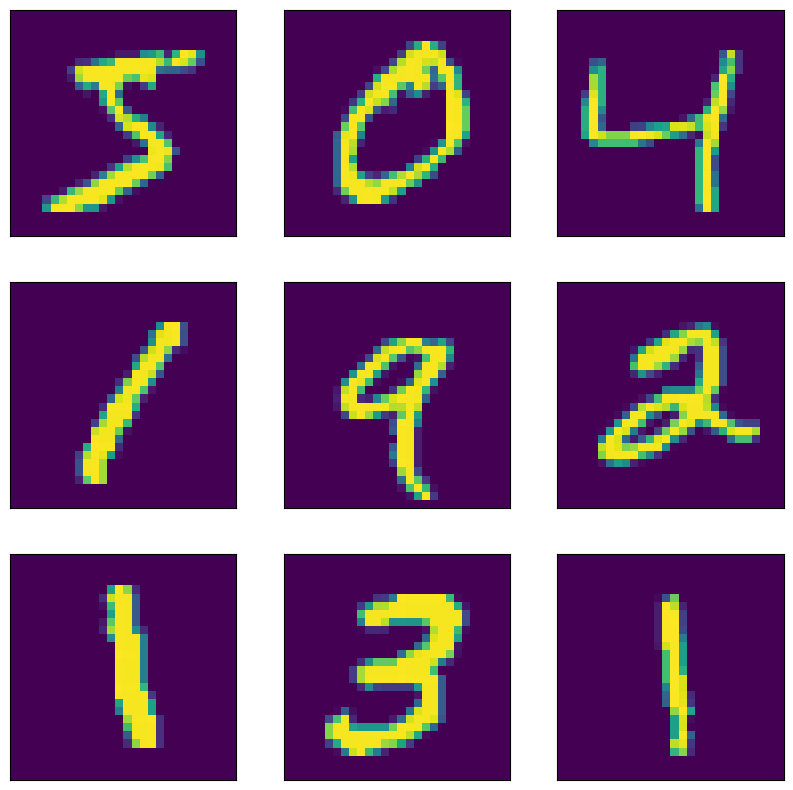

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])

In [ ]:
 X_train =  X_train.reshape((60000,28,28,1)).astype('float32')/255.0
 X_test = X_test.reshape((10000,28,28,1)).astype('float32')/255.0

 y_train = to_categorical(y_train)
 y_test = to_categorical(y_test)

In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
print(model.summary())

history = model.fit(X_train,y_train,epochs=15,batch_size=64,validation_split=0.2)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [ ]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test,y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 13ms/step - loss: 0.0377 - accuracy: 0.9906
Test accuracy: 0.9905999898910522


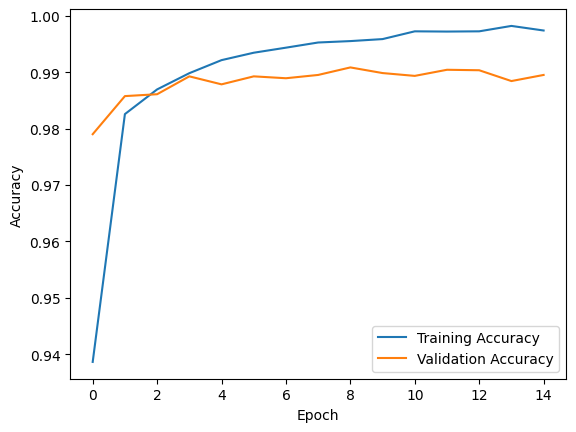

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

# **6. Digit classification using pre-trained networks like VGGnet-19 for MNIST dataset and analyse and visualize performance improvements.**

In [ ]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.applications import VGG19
from keras import layers,models
from keras.utils import to_categorical


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'X_train shape: {X_train.shape}')

11490434/11490434 [==============================] - 1s 0us/step
X_train shape: (60000, 28, 28)


In [ ]:
X_train = np.repeat(tf.image.resize(X_train[...,np.newaxis],(32,32)).numpy(),3,axis=-1)
X_test=np.repeat(tf.image.resize(X_test[...,np.newaxis],(32,32)).numpy(),3,axis=-1)
print(f'X_train shape: {X_train[0].shape}')

X_train shape: (32, 32, 3)


In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
base_model = VGG19(include_top=False,
    weights='imagenet',
    input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(10,activation='softmax')])

model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train,y_train,
                    epochs=5,batch_size=64,
                    validation_split=0.2)
model.summary()

80134624/80134624 [==============================] - 3s 0us/step
Epoch 1/5
750/750 [==============================] - 21s 17ms/step - loss: 0.3496 - accuracy: 0.9030 - val_loss: 0.1688 - val_accuracy: 0.9478
Epoch 2/5
750/750 [==============================] - 12s 16ms/step - loss: 0.1468 - accuracy: 0.9547 - val_loss: 0.1252 - val_accuracy: 0.9608
Epoch 3/5
750/750 [==============================] - 12s 17ms/step - loss: 0.1208 - accuracy: 0.9615 - val_loss: 0.1032 - val_accuracy: 0.9682
Epoch 4/5
750/750 [==============================] - 14s 18ms/step - loss: 0.1080 - accuracy: 0.9649 - val_loss: 0.0971 - val_accuracy: 0.9701
Epoch 5/5
750/750 [==============================] - 12s 16ms/step - loss: 0.0979 - accuracy: 0.9677 - val_loss: 0.0993 - val_accuracy: 0.9692
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
  

In [ ]:
score = model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.1007 - accuracy: 0.9686


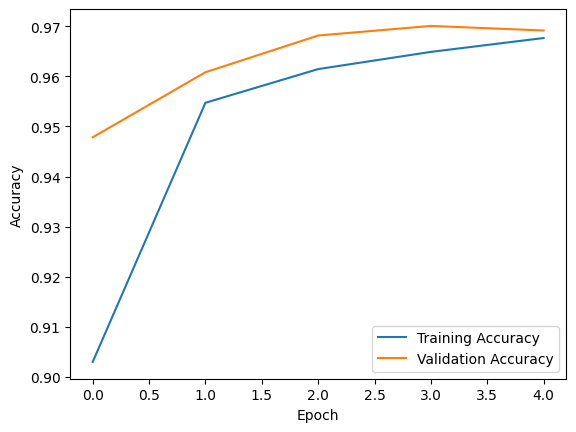

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

# **7. Implement a simple RNN for review classification using IMDB dataset.**

In [ ]:
from keras.datasets import imdb
import tensorflow as tf
from keras import layers,models,Sequential

from keras.preprocessing import sequence
from keras.utils import pad_sequences

In [ ]:
max_features = 5000
max_words=500
(X_train,y_train), (X_test,y_test) = imdb.load_data(num_words=max_features)
print(f'{len(X_train)} train sequences\n{len(X_test)} test sequences')

17464789/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences


In [ ]:
# pad sequences to fixed length
X_train = sequence.pad_sequences(X_train,maxlen=max_words)
X_test = sequence.pad_sequences(X_test,maxlen=max_words)
print('train data shape: ',X_train.shape)
print('test data shape: ',X_test.shape)

train data shape:  (25000, 500)
test data shape:  (25000, 500)


In [ ]:
model = models.Sequential()
model.add(layers.Embedding(max_features,32,input_length=max_words))
model.add(layers.SimpleRNN(100))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               13300     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 173401 (677.35 KB)
Trainable params: 173401 (677.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']

)

In [ ]:
history = model.fit(X_train,y_train,epochs=15,batch_size=64,validation_split=0.2)

Epoch 1/15
313/313 [==============================] - 230s 708ms/step - loss: 0.6843 - accuracy: 0.5573 - val_loss: 0.6633 - val_accuracy: 0.6072
Epoch 2/15
313/313 [==============================] - 202s 643ms/step - loss: 0.6137 - accuracy: 0.6628 - val_loss: 0.5813 - val_accuracy: 0.6786
Epoch 3/15
313/313 [==============================] - 192s 616ms/step - loss: 0.5331 - accuracy: 0.7311 - val_loss: 0.6571 - val_accuracy: 0.6026
Epoch 4/15
313/313 [==============================] - 183s 585ms/step - loss: 0.5762 - accuracy: 0.7063 - val_loss: 0.6230 - val_accuracy: 0.6370
Epoch 5/15
313/313 [==============================] - 186s 594ms/step - loss: 0.5012 - accuracy: 0.7538 - val_loss: 0.5484 - val_accuracy: 0.7418
Epoch 6/15
313/313 [==============================] - 180s 576ms/step - loss: 0.4430 - accuracy: 0.7979 - val_loss: 0.5692 - val_accuracy: 0.7314
Epoch 7/15
313/313 [==============================] - 182s 582ms/step - loss: 0.4193 - accuracy: 0.8134 - val_loss: 0.5856 -

In [ ]:
model.evaluate(X_test,y_test)

782/782 [==============================] - 34s 44ms/step - loss: 0.6362 - accuracy: 0.7154


[0.6362121105194092, 0.7153599858283997]

# **8. Analyse and visualize the performance change while using LSTM and GRU instead of simple RNN**

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense

# Load the IMDB dataset
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut off reviews after this number of words
batch_size = 32

print('Loading data...')
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
print(len(train_data), 'train sequences')
print(len(test_data), 'test sequences')

# Pad sequences to a fixed length
print('Pad sequences (samples x time)')
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)
print('Train data shape:', train_data.shape)
print('Test data shape:', test_data.shape)

# Define a function to create and train a model
def create_and_train_model(model_type):
    model = Sequential()

    # Add an Embedding layer
    model.add(Embedding(max_features, 32))

    # Choose the RNN layer based on the provided model type
    if model_type == 'SimpleRNN':
        model.add(SimpleRNN(32))
    elif model_type == 'LSTM':
        model.add(LSTM(32))
    elif model_type == 'GRU':
        model.add(GRU(32))
    else:
        raise ValueError("Invalid model type. Use 'SimpleRNN', 'LSTM', or 'GRU'.")

    # Add a Dense layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_data, train_labels, epochs=5, batch_size=batch_size, validation_split=0.2, verbose=0)

    return model, history

# Create and train models for SimpleRNN, LSTM, and GRU
model_rnn, history_rnn = create_and_train_model('SimpleRNN')
model_lstm, history_lstm = create_and_train_model('LSTM')
model_gru, history_gru = create_and_train_model('GRU')

# Evaluate models on the test set
results_rnn = model_rnn.evaluate(test_data, test_labels, verbose=0)
results_lstm = model_lstm.evaluate(test_data, test_labels, verbose=0)
results_gru = model_gru.evaluate(test_data, test_labels, verbose=0)

# Print test accuracy
print(f'Test accuracy (SimpleRNN): {results_rnn[1]}')
print(f'Test accuracy (LSTM): {results_lstm[1]}')
print(f'Test accuracy (GRU): {results_gru[1]}')



Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
Train data shape: (25000, 500)
Test data shape: (25000, 500)
Test accuracy (SimpleRNN): 0.8583599925041199
Test accuracy (LSTM): 0.8650400042533875
Test accuracy (GRU): 0.8829600214958191


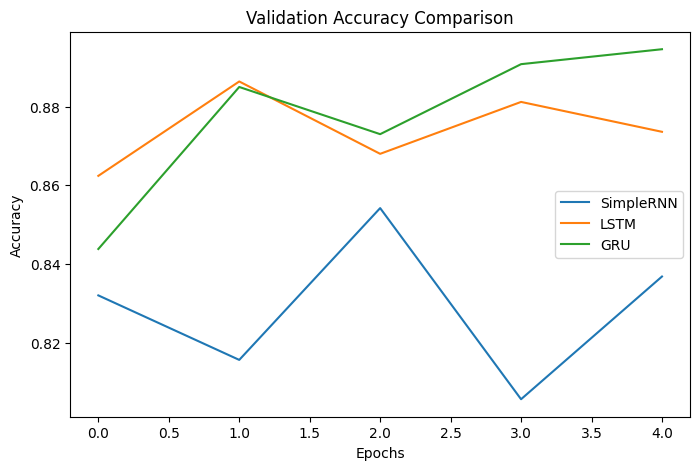

In [ ]:
# Plot validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_rnn.history['val_accuracy'], label='SimpleRNN')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM')
plt.plot(history_gru.history['val_accuracy'], label='GRU')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#predictions
predictions_rnn = model_rnn.predict(test_data)
predictions_lstm = model_lstm.predict(test_data)
predictions_gru = model_gru.predict(test_data)



782/782 [==============================] - 5s 6ms/step


# **9. Implement time series forecasting prediction for NIFTY-50 dataset**.


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DL LAB S7/NIFTY.csv', index_col='Date', parse_dates=True)
data.head()

<ipython-input-2-bbf3a80c323a>:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv('/content/drive/MyDrive/DL LAB S7/NIFTY.csv', index_col='Date', parse_dates=True)


,Open,High,Low,Turnover
Date,,,,
2009-02-03,43.19,43.38,41.44,43.17
2009-03-03,43.17,43.90,41.20,43.89
2009-04-03,43.89,43.89,42.16,42.52
2009-05-03,42.52,42.71,40.41,41.49
2009-06-03,41.49,41.49,37.57,38.16


In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)
data_scaled

array([[0.44754647, 0.42956052, 0.4862573 , 0.4472731 ],
       [0.4472731 , 0.43641819, 0.4826868 , 0.45711454],
       [0.45711454, 0.43628631, 0.4969688 , 0.43838846],
       ...,
       [0.45325314, 0.43285747, 0.46777253, 0.42099508],
       [0.42099508, 0.40760278, 0.45973891, 0.4029866 ],
       [0.4029866 , 0.38406251, 0.41347119, 0.38217605]])

In [ ]:

# Split the data into training and testing sets
n = int(len(data_scaled) * 0.8)
train_data = data_scaled[:n]
test_data = data_scaled[n:]

# Define the parameters
n_input = 3
n_features = 4

In [ ]:
# Create time series generators
generator_train = TimeseriesGenerator(train_data, train_data, length=n_input)
generator_test = TimeseriesGenerator(test_data, test_data, length=n_input)

In [ ]:
generator_train[0]

(array([[[0.44754647, 0.42956052, 0.4862573 , 0.4472731 ],
         [0.4472731 , 0.43641819, 0.4826868 , 0.45711454],
         [0.45711454, 0.43628631, 0.4969688 , 0.43838846]],
 
        [[0.4472731 , 0.43641819, 0.4826868 , 0.45711454],
         [0.45711454, 0.43628631, 0.4969688 , 0.43838846],
         [0.43838846, 0.42072467, 0.47093391, 0.42430973]],
 
        [[0.45711454, 0.43628631, 0.4969688 , 0.43838846],
         [0.43838846, 0.42072467, 0.47093391, 0.42430973],
         [0.42430973, 0.40463552, 0.42868301, 0.37879306]],
 
        ...,
 
        [[0.31824084, 0.32300287, 0.36515788, 0.31947102],
         [0.31947102, 0.30348488, 0.34804924, 0.29992482],
         [0.31646391, 0.30058356, 0.34447874, 0.29527747]],
 
        [[0.31947102, 0.30348488, 0.34804924, 0.29992482],
         [0.31646391, 0.30058356, 0.34447874, 0.29527747],
         [0.21367551, 0.28489005, 0.25774538, 0.29158693]],
 
        [[0.31646391, 0.30058356, 0.34447874, 0.29527747],
         [0.21367551, 0.28

In [ ]:
# Build the RNN model
model = Sequential()
model.add(layers.LSTM(50, activation='relu'))
model.add(Dense(4))
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])


# Train the model
model.fit(generator_train, epochs=50)


Epoch 1/50
18/18 [==============================] - 3s 11ms/step - loss: 0.0184 - accuracy: 0.5425
Epoch 2/50
18/18 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.8210
Epoch 3/50
18/18 [==============================] - 0s 11ms/step - loss: 0.0054 - accuracy: 0.8210
Epoch 4/50
18/18 [==============================] - 0s 10ms/step - loss: 0.0038 - accuracy: 0.8210
Epoch 5/50
18/18 [==============================] - 0s 11ms/step - loss: 0.0030 - accuracy: 0.8024
Epoch 6/50
18/18 [==============================] - 0s 10ms/step - loss: 0.0023 - accuracy: 0.6370
Epoch 7/50
18/18 [==============================] - 0s 11ms/step - loss: 0.0019 - accuracy: 0.5416
Epoch 8/50
18/18 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 0.5235
Epoch 9/50
18/18 [==============================] - 0s 10ms/step - loss: 8.8252e-04 - accuracy: 0.4914
Epoch 10/50
18/18 [==============================] - 0s 10ms/step - loss: 6.2975e-04 - accuracy: 0.5533
Ep

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                11000     
                                                                 
 dense_3 (Dense)             (None, 4)                 204       
                                                                 
Total params: 11204 (43.77 KB)
Trainable params: 11204 (43.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Evaluate the model on the test set
model.evaluate(generator_test)

5/5 [==============================] - 0s 10ms/step - loss: 8.8715e-04 - accuracy: 0.5572


[0.0008871516329236329, 0.5571687817573547]

In [ ]:
# Make predictions on the test set
predictions = model.predict(generator_test)
predictions

5/5 [==============================] - 0s 5ms/step


array([[0.11395665, 0.11410186, 0.1309043 , 0.11727935],
       [0.11760904, 0.12378584, 0.13550733, 0.12555383],
       [0.11276945, 0.11939283, 0.12960596, 0.11811133],
       ...,
       [0.3904209 , 0.39378923, 0.42502874, 0.3987396 ],
       [0.41211098, 0.42068988, 0.45026392, 0.41997573],
       [0.40956986, 0.42264092, 0.4428761 , 0.41472122]], dtype=float32)

In [ ]:
# Inverse transform the predictions and actual values to the original scale
predictions_original = scaler.inverse_transform(predictions)
test_data_original = scaler.inverse_transform(test_data[n_input:])
test_data_original,predictions_original

(array([[19.465 , 24.035 , 15.2625, 17.7725],
        [17.7725, 20.4225, 15.15  , 19.23  ],
        [19.23  , 19.23  , 16.5675, 17.8825],
        ...,
        [43.6075, 43.63  , 40.1975, 41.2475],
        [41.2475, 41.715 , 39.6575, 39.93  ],
        [39.93  , 39.93  , 36.5475, 38.4075]]),
 array([[18.784569, 19.45956 , 17.55406 , 19.027657],
        [19.051777, 20.19387 , 17.863464, 19.633018],
        [18.697712, 19.86076 , 17.46679 , 19.088524],
        ...,
        [39.010693, 40.667553, 37.32437 , 39.61929 ],
        [40.597538, 42.707363, 39.02062 , 41.172924],
        [40.41163 , 42.855305, 38.524025, 40.788506]], dtype=float32))

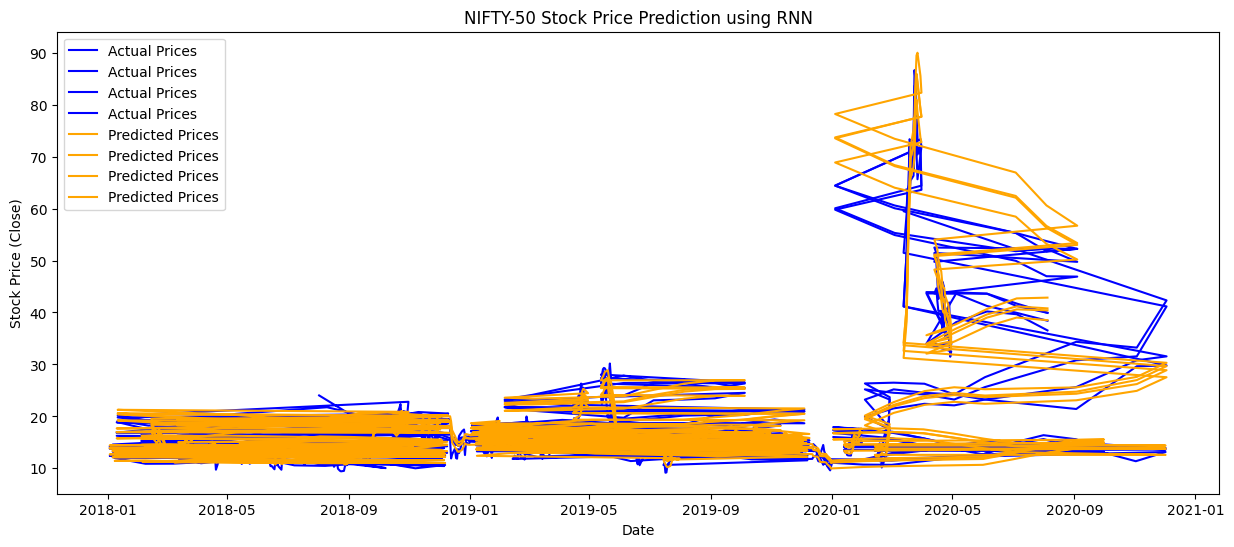

In [ ]:

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(data.index[n + n_input:], test_data_original, label='Actual Prices', color='blue')
plt.plot(data.index[n + n_input:], predictions_original, label='Predicted Prices', color='orange')
plt.title('NIFTY-50 Stock Price Prediction using RNN')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.legend()
plt.show()

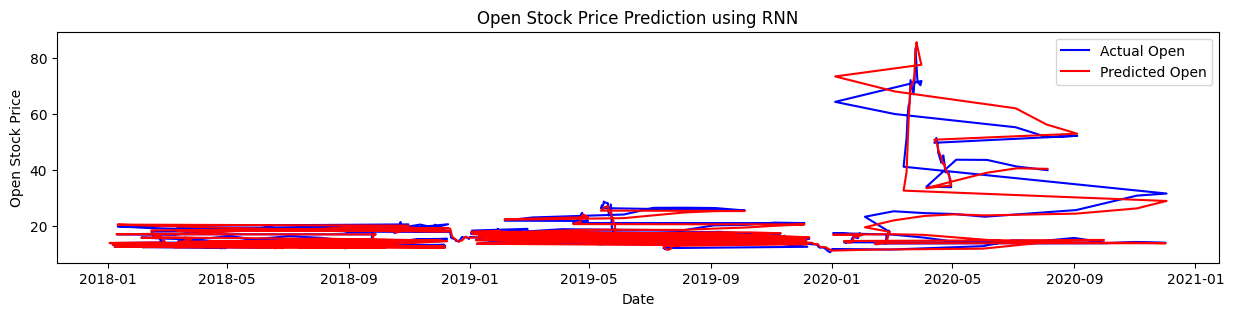

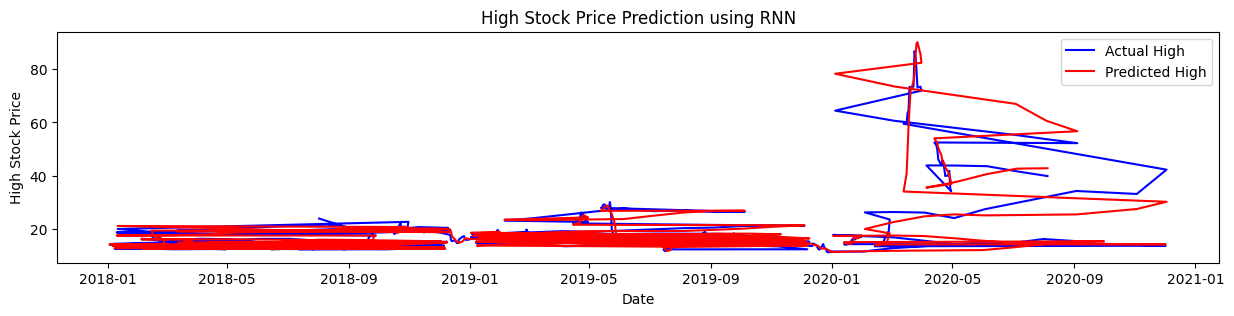

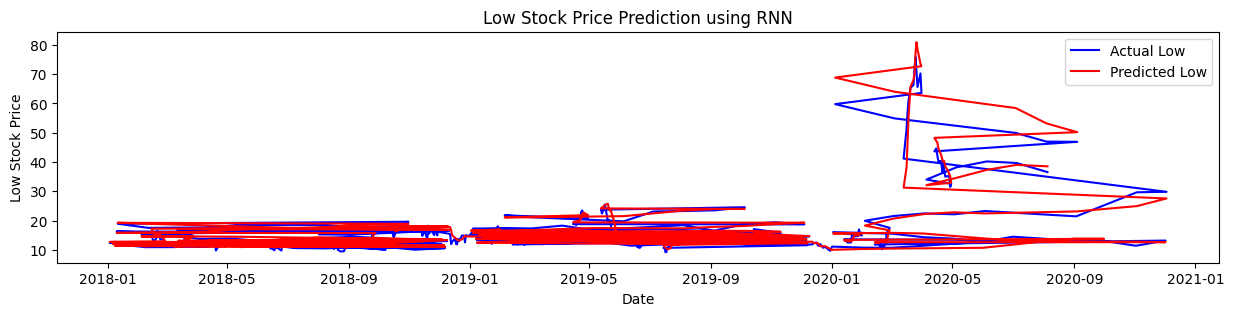

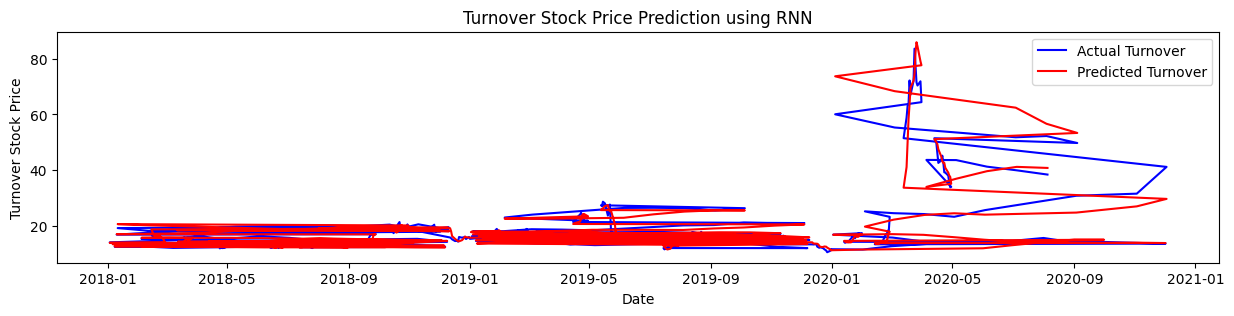

In [ ]:
# Plot the results for each variable
variables = ['Open', 'High', 'Low', 'Turnover']

for i, variable in enumerate(variables):
    plt.figure(figsize=(15, 3))  # Adjust the height as needed

    # Plot actual prices (test_data_original)
    plt.plot(data.index[n + n_input:], test_data_original[:, i], label=f'Actual {variable}', color='blue')

    # Plot predicted prices (predictions_original)
    plt.plot(data.index[n + n_input:], predictions_original[:, i], label=f'Predicted {variable}', color='red')

    # Add title and axis labels
    plt.title(f'{variable} Stock Price Prediction using RNN')
    plt.xlabel('Date')
    plt.ylabel(f'{variable} Stock Price')
    plt.legend()
    plt.show()


